In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mqt.predictor import rl, ml
df = pd.read_csv(ml.helper.get_path_results(), sep=',')

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18

apply_normalization = False

mqt_color = "#1E88E5"
best_color = "#004D40"
median_color = "#FFC107"
worst_color = "#D81B60"
marker_mqt = "+"
marker_best = "o"
marker_median = "."
marker_worst = "x"

/Users/nils/Desktop/mqt-predictor/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 2x2 Matrix With Mean Results and Optimization Criterion Comparison

In [2]:
tmp_df = df[df["MQTPredictor_expected_fidelity_expected_fidelity"]>=0]
tmp_df = tmp_df[tmp_df["MQTPredictor_critical_depth_expected_fidelity"]>=0]
MQT_expected_fidelity = [tmp_df["MQTPredictor_expected_fidelity_expected_fidelity"].mean(),  tmp_df["MQTPredictor_expected_fidelity_critical_depth"].mean()]
MQT_critical_depth = [tmp_df["MQTPredictor_critical_depth_expected_fidelity"].mean(), tmp_df["MQTPredictor_critical_depth_critical_depth"].mean()]

In [3]:
print(np.round(MQT_expected_fidelity,2))
print(np.round(MQT_critical_depth,2))

[0.67 0.42]
[0.12 0.55]


## Calcualte Data Points

In [4]:
def calculate_median(row, column_name):
    columns = [col for col in row.index if col.endswith(column_name) and not "MQT" in col]
    values = [value for col, value in row[columns].items() if value != -1]
    return np.median(values) if values else None

df['expected_fidelity_median'] = df.apply(calculate_median, column_name="_expected_fidelity",axis=1)
df['critical_depth_median'] = df.apply(calculate_median, column_name="_critical_depth",axis=1)
df['expected_fidelity_min_other'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_expected_fidelity') and 'MQT' not in col]].replace(-1, np.nan).min(skipna=True), axis=1)
df['expected_fidelity_max_other'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_expected_fidelity') and 'MQT' not in col]].max(), axis=1)
df['critical_depth_min_other'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_critical_depth') and 'MQT' not in col]].replace(-1, np.nan).min(skipna=True), axis=1)
df['critical_depth_max_other'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_critical_depth') and 'MQT' not in col]].max(), axis=1)

/var/folders/f4/n3_mnvbd6q50h0gtzy84vyn40000gn/T/ipykernel_7988/628519251.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['expected_fidelity_min_other'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_expected_fidelity') and 'MQT' not in col]].replace(-1, np.nan).min(skipna=True), axis=1)
/var/folders/f4/n3_mnvbd6q50h0gtzy84vyn40000gn/T/ipykernel_7988/628519251.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['expected_fidelity_min_other'] = df.apply(lambda row: row[[col for col in row.index if 

## Optionally: Normalize

In [5]:
if apply_normalization:
    divider_column_name = 'expected_fidelity_max_other'
    
    # Get the list of column names ending with "_expected_fidelity"
    columns_to_divide = [col for col in df.columns if col.endswith("_expected_fidelity") or col in ['expected_fidelity_min_other', 'exptected_expected_fidelity_max_other', 'exptected_expected_fidelity_median' ]]
    
    # Iterate through each column and perform the division
    for col_name in columns_to_divide:
        df[col_name] = df[col_name].divide(df[divider_column_name])
    
    divider_column_name = 'critical_depth_max_other'
    
    # Get the list of column names ending with "_expected_fidelity"
    columns_to_divide = [col for col in df.columns if col.endswith("_critical_depth") or col in ['critical_depth_min_other', 'critical_depth_max_other',  'critical_depth_median' ]]
    
    # Iterate through each column and perform the division
    for col_name in columns_to_divide:
        df[col_name] = df[col_name].divide(df[divider_column_name])

# Expected Fidelity

In [6]:
predictor = ml.Predictor()

training_data = predictor.get_prepared_training_data(figure_of_merit="expected_fidelity", save_non_zero_indices=True)
indices_test = training_data.indices_test
names_list = training_data.names_list

test_benchmarks_expected_fidelity = [names_list[index_test] for index_test in indices_test]
df_filtered_expected_fidelity = df[df["file_path"].isin(test_benchmarks_expected_fidelity)]
df_filtered_expected_fidelity = df_filtered_expected_fidelity[df_filtered_expected_fidelity["MQTPredictor_expected_fidelity_expected_fidelity"]>=0]

In [7]:
df_filtered_expected_fidelity["MQT_Predictor_Improvement_expected_fidelity"] = df_filtered_expected_fidelity["MQTPredictor_expected_fidelity_expected_fidelity"] / df_filtered_expected_fidelity["expected_fidelity_max_other"]
df_filtered_expected_fidelity.sort_values("MQT_Predictor_Improvement_expected_fidelity")

,file_path,benchmark_name,num_qubits,MQTPredictor_expected_fidelity_time,MQTPredictor_expected_fidelity_expected_fidelity,MQTPredictor_expected_fidelity_critical_depth,MQTPredictor_critical_depth_time,MQTPredictor_critical_depth_expected_fidelity,MQTPredictor_critical_depth_critical_depth,qiskit_ibm_washington_time,...,tket_quantinuum_h2_time,tket_quantinuum_h2_expected_fidelity,tket_quantinuum_h2_critical_depth,expected_fidelity_median,critical_depth_median,expected_fidelity_min_other,expected_fidelity_max_other,critical_depth_min_other,critical_depth_max_other,MQT_Predictor_Improvement_expected_fidelity
245,random_indep_qiskit_30,random,30,-1,0.000000e+00,0.711445,-1,0.000000e+00,0.776602,11.711917,...,39.126353,9.000000e-10,0.778257,0.000000e+00,0.708466,0.0,0.000149,0.690363,0.778257,0.000000
247,qft_indep_qiskit_30,qft,30,-1,0.000000e+00,0.651829,-1,2.685000e-07,0.872131,3.575140,...,13.819220,4.554815e-04,0.868966,0.000000e+00,0.757350,0.0,0.009371,0.700823,0.872131,0.000000
126,qftentangled_indep_qiskit_30,qftentangled,30,-1,0.000000e+00,0.643415,-1,7.678944e-03,0.873941,4.345347,...,15.299786,2.693482e-04,0.872845,0.000000e+00,0.816879,0.0,0.007679,0.746386,0.873941,0.000000
367,dj_indep_tket_60,dj,60,-1,1.957000e-07,0.506732,-1,0.000000e+00,0.765009,0.730924,...,-1.000000,-1.000000e+00,-1.000000,1.500000e-10,0.475551,0.0,0.003194,0.197674,0.780651,0.000061
292,wstate_indep_qiskit_40,wstate,40,-1,1.931983e-04,0.273684,-1,0.000000e+00,0.588785,15.289049,...,-1.000000,-1.000000e+00,-1.000000,5.227580e-02,0.474359,0.0,0.145627,0.474359,0.474359,0.001327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,ae_indep_tket_40,ae,40,-1,0.000000e+00,0.733416,-1,0.000000e+00,0.682820,9.014126,...,-1.000000,-1.000000e+00,-1.000000,0.000000e+00,0.726748,0.0,0.000000,0.702482,0.753837,NaN
305,realamprandom_indep_qiskit_40,realamprandom,40,-1,0.000000e+00,0.799908,-1,0.000000e+00,0.845834,23.315970,...,-1.000000,-1.000000e+00,-1.000000,0.000000e+00,0.798661,0.0,0.000000,0.787679,0.806963,NaN
335,qpeinexact_indep_qiskit_40,qpeinexact,40,-1,0.000000e+00,0.627387,-1,0.000000e+00,0.790038,16.340810,...,-1.000000,-1.000000e+00,-1.000000,0.000000e+00,0.726241,0.0,0.000000,0.696638,0.735469,NaN
363,qpeinexact_indep_qiskit_60,qpeinexact,60,-1,0.000000e+00,0.636281,-1,0.000000e+00,0.827994,24.329108,...,-1.000000,-1.000000e+00,-1.000000,0.000000e+00,0.744127,0.0,0.000000,0.722466,0.803750,NaN


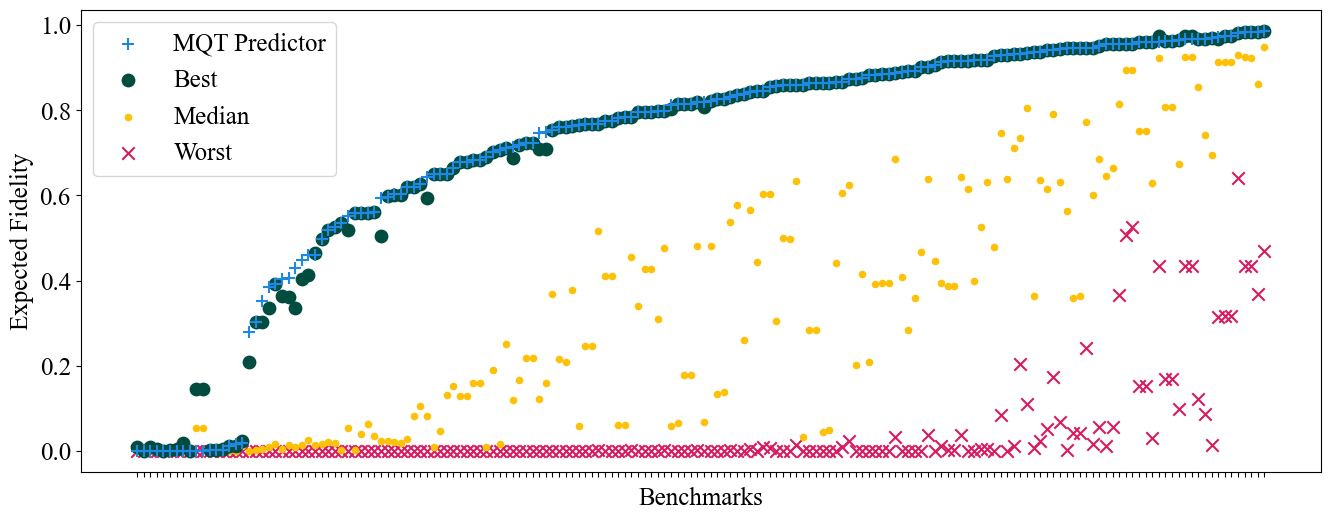

In [8]:
plot_kind = "scatter"
scatter_plot_size = 80
df_filtered_and_sorted_expected_fidelity = df_filtered_expected_fidelity.sort_values(by=['MQTPredictor_expected_fidelity_expected_fidelity'])
df_filtered_and_sorted_expected_fidelity = df_filtered_and_sorted_expected_fidelity[~((df_filtered_and_sorted_expected_fidelity["expected_fidelity_max_other"]==0) & (df_filtered_and_sorted_expected_fidelity["MQTPredictor_expected_fidelity_expected_fidelity"]==0))]

ax =df_filtered_and_sorted_expected_fidelity.plot(x="file_path", y="expected_fidelity_min_other", label="Worst", rot=90, kind=plot_kind,color=worst_color, marker=marker_worst, s=scatter_plot_size)
df_filtered_and_sorted_expected_fidelity.plot(x="file_path", y="expected_fidelity_median", kind=plot_kind, rot=90, ax=ax, color=median_color, label="Median", marker=marker_median, s=scatter_plot_size)
df_filtered_and_sorted_expected_fidelity.plot(x="file_path", y="expected_fidelity_max_other", label="Best", rot=90,  ax=ax, kind=plot_kind, color=best_color, marker=marker_best, s=scatter_plot_size, figsize=[16, 6.0] )
df_filtered_and_sorted_expected_fidelity.plot(x="file_path", y="MQTPredictor_expected_fidelity_expected_fidelity", label="MQT Predictor", kind=plot_kind, rot=90, ax=ax, color=mqt_color, marker=marker_mqt, s=scatter_plot_size)



if plot_kind == "line":
    plt.xticks(range(len(df_filtered_and_sorted_expected_fidelity.file_path)), df_filtered_and_sorted_expected_fidelity.file_path)

plt.xticks(
    list(range(0, len(df_filtered_and_sorted_expected_fidelity.file_path), 1)),
    [ "" for i in range(0, len(df_filtered_and_sorted_expected_fidelity.file_path), 1)],
    fontsize=18,
)

plt.xlabel("Benchmarks")
plt.ylabel("Expected Fidelity")

handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

plt.savefig("results/expected_fidelity_plot.pdf", bbox_inches='tight')

## Top 3 expected_fidelity

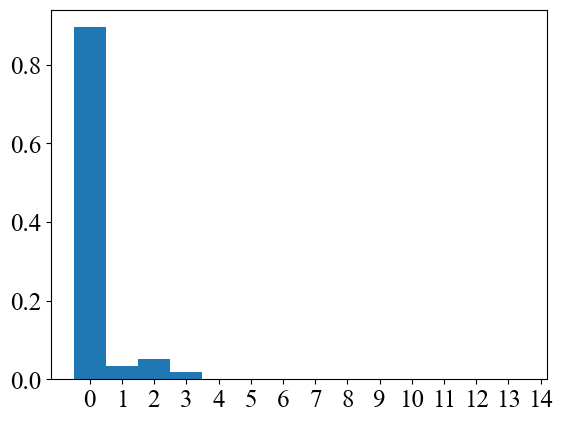

In [9]:
df_filtered_and_sorted_expected_fidelity['Rank_MQT_expected_fidelity'] = df_filtered_and_sorted_expected_fidelity.apply(lambda row: sum(1 for col in df_filtered_and_sorted_expected_fidelity.columns if col.endswith('_expected_fidelity') and not "MQT" in col and row['MQTPredictor_expected_fidelity_expected_fidelity'] <row[col]), axis=1)

plt.hist(df_filtered_and_sorted_expected_fidelity.Rank_MQT_expected_fidelity.values, bins=range(0,15,1), align="left", weights=np.ones(len(df_filtered_and_sorted_expected_fidelity)) / len(df_filtered_and_sorted_expected_fidelity))
plt.xticks(range(0,15,1));

In [10]:
count_top3 = 0
for index, row in df_filtered_and_sorted_expected_fidelity.iterrows():
    if row['Rank_MQT_expected_fidelity'] in [0, 1, 2]:
        count_top3 += 1
        
print("Percentage of Top-3:", count_top3/len(df_filtered_and_sorted_expected_fidelity))

Percentage of Top-3: 0.9825581395348837


# Critical Depth

In [11]:
predictor = ml.Predictor()
training_data = predictor.get_prepared_training_data(figure_of_merit="critical_depth", save_non_zero_indices=True)
indices_test = training_data.indices_test
names_list = training_data.names_list

test_benchmarks_critical_depth = [names_list[index_test] for index_test in indices_test]
df_filtered_critical_depth = df[df["file_path"].isin(test_benchmarks_critical_depth)]
df_filtered_critical_depth = df_filtered_critical_depth[df_filtered_critical_depth["MQTPredictor_critical_depth_critical_depth"]>=0]

In [12]:
df_filtered_critical_depth["MQT_Predictor_Improvement_critical_depth"] = df_filtered_critical_depth["MQTPredictor_critical_depth_critical_depth"] / df_filtered_critical_depth["critical_depth_max_other"]
df_filtered_critical_depth.sort_values("MQT_Predictor_Improvement_critical_depth")

,file_path,benchmark_name,num_qubits,MQTPredictor_expected_fidelity_time,MQTPredictor_expected_fidelity_expected_fidelity,MQTPredictor_expected_fidelity_critical_depth,MQTPredictor_critical_depth_time,MQTPredictor_critical_depth_expected_fidelity,MQTPredictor_critical_depth_critical_depth,qiskit_ibm_washington_time,...,tket_quantinuum_h2_time,tket_quantinuum_h2_expected_fidelity,tket_quantinuum_h2_critical_depth,expected_fidelity_median,critical_depth_median,expected_fidelity_min_other,expected_fidelity_max_other,critical_depth_min_other,critical_depth_max_other,MQT_Predictor_Improvement_critical_depth
34,pricingcall_indep_tket_5,pricingcall,5,-1,0.766989,0.060000,-1,1.254500e-05,0.053763,0.341078,...,1.035668,0.530242,0.057143,0.246287,0.065217,4.962000e-07,0.766989,0.036585,0.119403,0.450269
297,dj_indep_tket_80,dj,80,-1,0.000047,0.182039,-1,0.000000e+00,0.434436,1.045447,...,-1.000000,-1.000000,-1.000000,0.000000,0.430246,0.000000e+00,0.000138,0.182119,0.786761,0.552183
321,dj_indep_qiskit_80,dj,80,-1,0.000518,0.120521,-1,1.000000e-10,0.466767,1.041848,...,-1.000000,-1.000000,-1.000000,0.000000,0.430246,0.000000e+00,0.000138,0.182119,0.786761,0.593277
492,dj_indep_tket_50,dj,50,-1,0.001162,0.304688,-1,0.000000e+00,0.428082,0.584335,...,-1.000000,-1.000000,-1.000000,0.000009,0.317734,0.000000e+00,0.008023,0.172414,0.705414,0.606852
123,dj_indep_tket_90,dj,90,-1,0.000058,0.243461,-1,0.000000e+00,0.465557,1.417482,...,-1.000000,-1.000000,-1.000000,0.000065,0.510910,0.000000e+00,0.000131,0.291262,0.730559,0.637261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,wstate_indep_tket_2,wstate,2,-1,0.983129,0.000000,-1,9.517752e-01,0.000000,0.213837,...,0.070812,0.967517,0.000000,0.924461,0.000000,4.345811e-01,0.983129,0.000000,0.000000,NaN
396,routing_indep_tket_2,routing,2,-1,0.973339,0.000000,-1,9.508294e-01,0.000000,0.063192,...,0.081204,0.963650,0.000000,0.913393,0.000000,3.164808e-01,0.973339,0.000000,0.000000,NaN
427,qft_indep_qiskit_2,qft,2,-1,0.965574,0.000000,-1,9.523970e-01,0.000000,0.031791,...,0.084547,0.965580,0.000000,0.914103,0.000000,3.173738e-01,0.965580,0.000000,0.000000,NaN
487,qpeinexact_indep_qiskit_2,qpeinexact,2,-1,0.987072,0.000000,-1,8.693850e-01,0.000000,0.024756,...,0.086483,0.975295,0.000000,0.944953,0.000000,4.894217e-01,0.987072,0.000000,0.000000,NaN


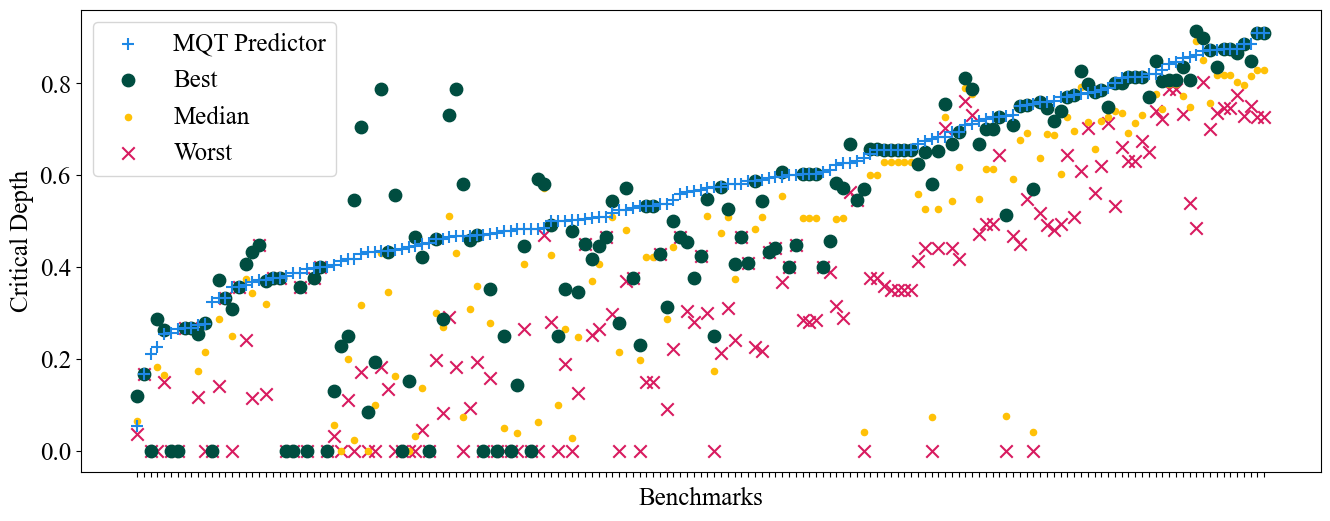

In [13]:
plot_kind = "scatter"
df_filtered_and_sorted_critical_depth = df_filtered_critical_depth.sort_values(by=['MQTPredictor_critical_depth_critical_depth'])
df_filtered_and_sorted_critical_depth = df_filtered_and_sorted_critical_depth[~((df_filtered_and_sorted_critical_depth["critical_depth_max_other"]==0) & (df_filtered_and_sorted_critical_depth["MQTPredictor_critical_depth_critical_depth"]==0))]

ax = df_filtered_and_sorted_critical_depth.plot(x="file_path", y="critical_depth_min_other", label="Worst", rot=90, kind=plot_kind, color=worst_color, marker=marker_worst, s=scatter_plot_size)
df_filtered_and_sorted_critical_depth.plot(x="file_path", y="critical_depth_median", kind=plot_kind, rot=90, ax=ax, color=median_color, label="Median", marker=marker_median, s=scatter_plot_size)
df_filtered_and_sorted_critical_depth.plot(x="file_path", y="critical_depth_max_other", label="Best", rot=90, kind=plot_kind, ax = ax, color=best_color, marker=marker_best, s=scatter_plot_size, figsize=[16, 6.0] )
df_filtered_and_sorted_critical_depth.plot(x="file_path", y="MQTPredictor_critical_depth_critical_depth", kind=plot_kind, rot=90, ax=ax, color=mqt_color, label="MQT Predictor", marker=marker_mqt, s=scatter_plot_size)


if plot_kind == "line":
    plt.xticks(range(len(df_filtered_and_sorted_critical_depth.file_path)), df_filtered_and_sorted_critical_depth.file_path);


plt.xticks(
    list(range(0, len(df_filtered_and_sorted_critical_depth.file_path), 1)),
    ["" for i in range(0, len(df_filtered_and_sorted_critical_depth), 1)],
    fontsize=18,
)

plt.xlabel("Benchmarks")
plt.ylabel("Critical Depth")

handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

plt.savefig("results/critical_depth_plot.pdf", bbox_inches='tight')

## Top 3 Critical Depth

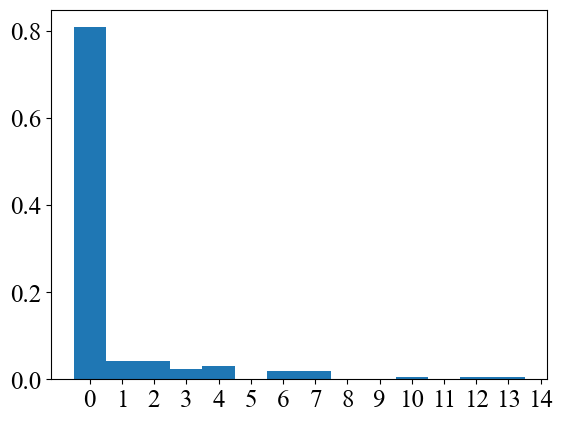

In [14]:
df_filtered_and_sorted_critical_depth['Rank_MQT_critical_depth'] = df_filtered_and_sorted_critical_depth.apply(lambda row: sum(1 for col in df_filtered_and_sorted_critical_depth.columns if col.endswith('_critical_depth') and not "MQT" in col and row['MQTPredictor_critical_depth_critical_depth'] < row[col]), axis=1)

plt.hist(df_filtered_and_sorted_critical_depth.Rank_MQT_critical_depth.values, bins=range(0,15,1), align="left", weights=np.ones(len(df_filtered_and_sorted_critical_depth)) / len(df_filtered_and_sorted_critical_depth))
plt.xticks(range(0,15,1));

In [15]:
count_top3 = 0
for index, row in df_filtered_and_sorted_critical_depth.iterrows():
    if row['Rank_MQT_critical_depth'] in [0, 1, 2]:
        count_top3 += 1

# Print the total count
print("Percentage of Top-3:", count_top3/len(df_filtered_and_sorted_critical_depth))

Percentage of Top-3: 0.8922155688622755


# GHZ Evaluation

In [16]:
df = pd.read_csv(ml.helper.get_path_results(ghz_results=True), sep=',')
df = df[df.num_qubits<32]
plt.rcParams["font.size"] = 18

In [17]:
df['expected_fidelity_median'] = df.apply(calculate_median, column_name="_expected_fidelity",axis=1)
df['critical_depth_median'] = df.apply(calculate_median, column_name="_critical_depth",axis=1)
df['expected_fidelity_min_other'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_expected_fidelity') and 'MQT' not in col]].replace(-1, np.nan).min(skipna=True), axis=1)
df['expected_fidelity_max_other'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_expected_fidelity') and 'MQT' not in col]].max(), axis=1)
df['critical_depth_min_other'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_critical_depth') and 'MQT' not in col]].replace(-1, np.nan).min(skipna=True), axis=1)
df['critical_depth_max_other'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_critical_depth') and 'MQT' not in col]].max(), axis=1)

/var/folders/f4/n3_mnvbd6q50h0gtzy84vyn40000gn/T/ipykernel_7988/3859663328.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['expected_fidelity_min_other'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_expected_fidelity') and 'MQT' not in col]].replace(-1, np.nan).min(skipna=True), axis=1)
/var/folders/f4/n3_mnvbd6q50h0gtzy84vyn40000gn/T/ipykernel_7988/3859663328.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['expected_fidelity_min_other'] = df.apply(lambda row: row[[col for col in row.index i

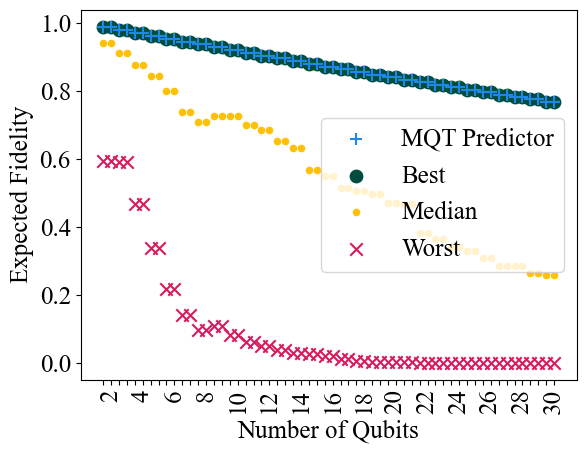

In [18]:
plot_kind = "scatter"
df = df.sort_values(by=['num_qubits'])
ax = df.plot(x="file_path", y="expected_fidelity_max_other", label="Best", rot=90, kind=plot_kind, color=best_color, marker=marker_best, s=scatter_plot_size)
df.plot(x="file_path", y="MQTPredictor_expected_fidelity_expected_fidelity", label="MQT Predictor", kind=plot_kind, rot=90, ax=ax, color=mqt_color, marker=marker_mqt, s=scatter_plot_size)
df.plot(x="file_path", y="expected_fidelity_median", kind=plot_kind, rot=90, ax=ax, color=median_color, label="Median", marker=marker_median, s=scatter_plot_size)
df.plot(x="file_path", y="expected_fidelity_min_other", label="Worst", rot=90, kind=plot_kind, ax=ax, color=worst_color, marker=marker_worst, s=scatter_plot_size)

if plot_kind == "line":
    plt.xticks(range(len(df.file_path)), df.file_path)

plt.xticks(
    list(range(0, len(df), 1)),
    [df.iloc[i].num_qubits if i % 4 == 1 else "" for i in range(len(df))],
)

plt.xlabel("Number of Qubits")
plt.ylabel("Expected Fidelity")

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0,2,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="center right") 


plt.savefig("results/expected_fidelity_ghz_plot.pdf", bbox_inches='tight')

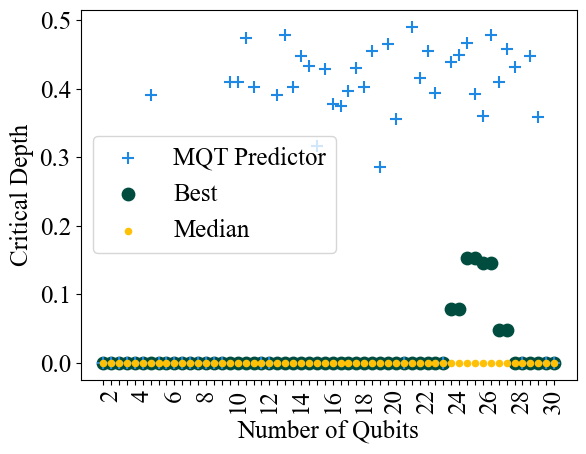

In [19]:
plot_kind = "scatter"
df = df.sort_values(by=['num_qubits'])
ax = df.plot(x="file_path", y="critical_depth_max_other", label="Best", rot=90, kind=plot_kind, color=best_color, marker=marker_best, s=scatter_plot_size)
df.plot(x="file_path", y="MQTPredictor_critical_depth_critical_depth", kind=plot_kind, rot=90, ax=ax, color=mqt_color, label="MQT Predictor", marker=marker_mqt, s=scatter_plot_size)
df.plot(x="file_path", y="critical_depth_median", kind=plot_kind, rot=90, ax=ax, color=median_color, label="Median", marker=marker_median, s=scatter_plot_size)

if plot_kind == "line":
    plt.xticks(range(len(df.file_path)), df.file_path);

plt.xticks(
    list(range(0, len(df), 1)),
    [df.iloc[i].num_qubits if i % 4 == 1 else "" for i in range(len(df))],
)

plt.xlabel("Number of Qubits")
plt.ylabel("Critical Depth")

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="center left")

plt.savefig("results/critical_depth_ghz_plot.pdf", bbox_inches='tight')

# Evaluation Journal Revision

In [20]:
df = pd.read_csv(ml.helper.get_path_results(), sep=',')
plt.rcParams["font.size"] = 12

device = "ibm_washington"
device_index = rl.helper.get_device_index_of_device(device)
devices = rl.helper.get_devices()
dist_colors = ["#fde725", "#90d743", "#35b779", "#21918c", "#31688e", "#443983", "#440154"]

def format_label(label):
    words = label.split('_')
    formatted_label = ' '.join(word.capitalize() for word in words)
    return formatted_label

## Data Preparation Expected Fidelity

In [21]:
training_data_expected_fidelity = predictor.get_prepared_training_data(figure_of_merit="expected_fidelity", save_non_zero_indices=True)
indices_test_expected_fidelity = training_data_expected_fidelity.indices_test
names_list_expected_fidelity = training_data_expected_fidelity.names_list
names_test_expected_fidelity = [names_list_expected_fidelity[index_test] for index_test in indices_test_expected_fidelity]
scores_test_expected_fidelity = [training_data_expected_fidelity.scores_list[index_test] for index_test in indices_test_expected_fidelity]
df_expected_fidelity = df[df["file_path"].isin(names_test_expected_fidelity)]
df_expected_fidelity = df_expected_fidelity[df_expected_fidelity["MQTPredictor_expected_fidelity_expected_fidelity"]>=0]
df_expected_fidelity["RL_" + device + "_expected_fidelity"] = df_expected_fidelity.apply(
    lambda row: max(
        scores_test_expected_fidelity[
            names_test_expected_fidelity.index(row["file_path"])
        ][device_index], 
        0), 
    axis=1)

In [22]:
len(df_expected_fidelity)

178

## Data Preparation Critical Depth

In [23]:
training_data_critical_depth = predictor.get_prepared_training_data(figure_of_merit="critical_depth", save_non_zero_indices=True)
indices_test_critical_depth = training_data_critical_depth.indices_test
names_list_critical_depth = training_data_critical_depth.names_list
names_test_critical_depth = [names_list_critical_depth[index_test] for index_test in indices_test_critical_depth]
scores_test_critical_depth = [training_data_critical_depth.scores_list[index_test] for index_test in indices_test_critical_depth]
df_critical_depth = df[df["file_path"].isin(names_test_critical_depth)]
df_critical_depth = df_critical_depth[df_critical_depth["MQTPredictor_critical_depth_critical_depth"]>=0]
df_critical_depth["RL_" + device + "_critical_depth"] = df_critical_depth.apply(lambda row: max(
        scores_test_critical_depth[
            names_test_critical_depth.index(row["file_path"])]
        [device_index], 
        0), 
    axis=1)


# Actual Device Distributions

['quantinuum_h2' 'ibm_washington' 'ionq_aria1'] ['#fde725', '#440154', '#90d743']
['rigetti_aspen_m2' 'ibm_washington' 'quantinuum_h2' 'ionq_aria1'
 'ionq_harmony' 'ibm_montreal' 'oqc_lucy'] ['#21918c', '#fde725', '#440154', '#443983', '#31688e', '#90d743', '#35b779']


/var/folders/f4/n3_mnvbd6q50h0gtzy84vyn40000gn/T/ipykernel_7988/3764787980.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = df.groupby(["num_qubits_interval", "best_device"]).size().unstack().fillna(0).plot(kind='bar', stacked=True, color=colors)
/var/folders/f4/n3_mnvbd6q50h0gtzy84vyn40000gn/T/ipykernel_7988/3764787980.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = df.groupby(["num_qubits_interval", "best_device"]).size().unstack().fillna(0).plot(kind='bar', stacked=True, color=colors)


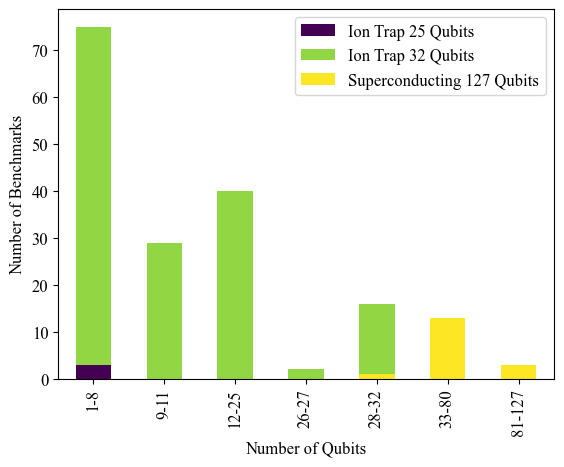

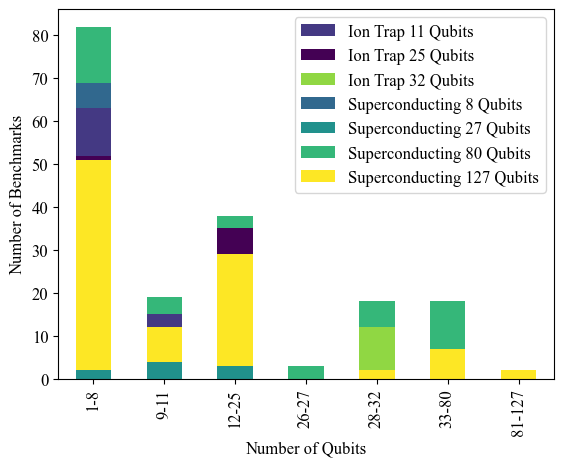

In [24]:

for fom in ["expected_fidelity", "critical_depth"]:
    if fom == "expected_fidelity":
        df = df_expected_fidelity
        df["best_device"] = df.apply(lambda row: devices[np.argmax(scores_test_expected_fidelity[names_test_expected_fidelity.index(row["file_path"])])]["name"], axis=1)
        colors = [dist_colors[0], dist_colors[6], dist_colors[1]]
    else:
        df = df_critical_depth
        df["best_device"] = df.apply(lambda row: devices[np.argmax(scores_test_critical_depth[names_test_critical_depth.index(row["file_path"])])]["name"], axis=1)
        colors = [dist_colors[rl.helper.get_device_index_of_device(device)] for device in df["best_device"].unique()]
    df["num_qubits_interval"] = pd.cut(df["num_qubits"], [0, 8, 11, 25, 27, 32, 80, 127], labels=["1-8", "9-11", "12-25", "26-27","28-32", "33-80", "81-127"])
    
    print(df["best_device"].unique(), colors)
    ax = df.groupby(["num_qubits_interval", "best_device"]).size().unstack().fillna(0).plot(kind='bar', stacked=True, color=colors)
    ax.set_xlabel("Number of Qubits")
    ax.set_ylabel("Number of Benchmarks")
    
    handles, labels = ax.get_legend_handles_labels()
    legend_labels={
        "ionq_harmony": "Ion Trap 11 Qubits",
        "ionq_aria1": "Ion Trap 25 Qubits",
        "quantinuum_h2": "Ion Trap 32 Qubits",
        "oqc_lucy": "Superconducting 8 Qubits",
        "ibm_montreal": "Superconducting 27 Qubits",
        "rigetti_aspen_m2": "Superconducting 80 Qubits",
        "ibm_washington": "Superconducting 127 Qubits",
    }
    filtered_labels = [label for label in labels if label in legend_labels]
    adjusted_labels = [legend_labels[label] for label in filtered_labels]
    adjusted_handles = [handles[labels.index(label)] for label in filtered_labels]
    
    def custom_sort(label):
        import re
        numbers = re.findall(r'\d+', label)
        number_value = int(numbers[0]) if numbers else float('inf')
        return (re.sub(r'\d+', '', label), number_value)

    adjusted_handles, adjusted_labels = zip(*sorted(zip(adjusted_handles, adjusted_labels), key=lambda x: custom_sort(x[1])))
    ax.legend(handles=adjusted_handles, labels=adjusted_labels, title="")
    ax.figure.savefig(f"results/actual_devices_{fom}.pdf", bbox_inches='tight')

# Eval ML

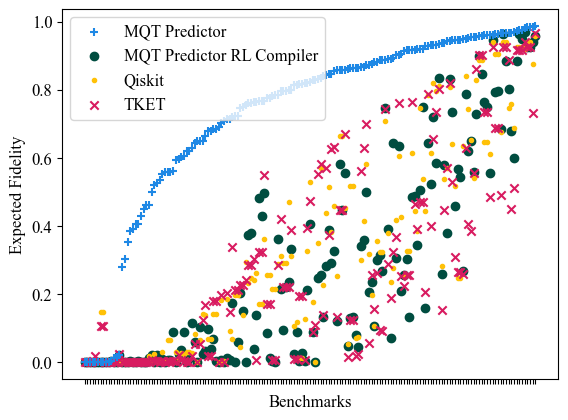

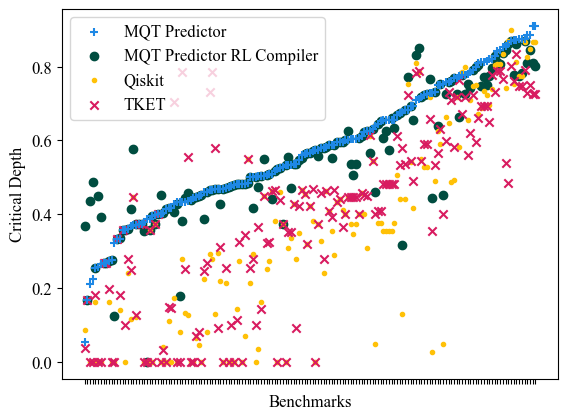

In [25]:
for fom in ["expected_fidelity", "critical_depth"]:
    if fom == "expected_fidelity":
        df = df_expected_fidelity
    else:
        df = df_critical_depth
    
    df = df[~((df[f'MQTPredictor_{fom}_{fom}']==0) & 
              (df[f"RL_" + device + f"_{fom}"]==0) & 
              (df["qiskit_" + device + f"_{fom}"]==0) & 
              (df["tket_" + device + f"_{fom}"]==0))]
    
    df = df.sort_values(by=[f'MQTPredictor_{fom}_{fom}'])
    
    plt.scatter(range(len(df)), df["RL_" + device + f"_{fom}"], label="MQT Predictor RL Compiler", color=best_color, marker=marker_best)
    plt.scatter(range(len(df)), df["qiskit_" + device + f"_{fom}"], label="Qiskit", color=median_color, marker=marker_median)
    plt.scatter(range(len(df)), df["tket_" + device + f"_{fom}"], label="TKET", color=worst_color, marker=marker_worst)
    plt.scatter(range(len(df)), df[f'MQTPredictor_{fom}_{fom}'], label="MQT Predictor", color=mqt_color, marker=marker_mqt)
    
    plt.xticks(
    list(range(0, len(df.file_path), 1)),
    [ "" for i in range(0, len(df.file_path), 1)],
    fontsize=12,
    )
    
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [3,0,1,2]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left') 

    plt.xlabel("Benchmarks")
    plt.ylabel(format_label(fom))
    plt.savefig(fname=f"results/ml_{fom}_comparison.pdf", bbox_inches='tight')
    plt.show()


## Eval RL

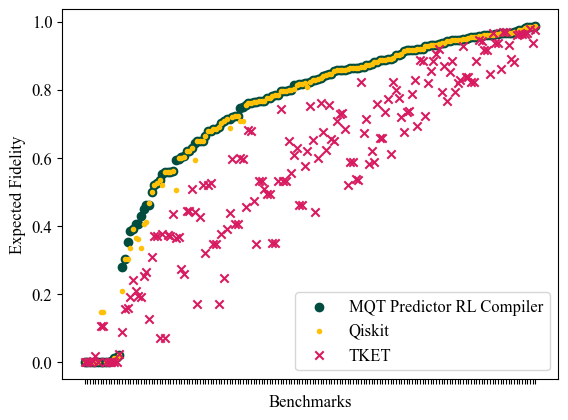

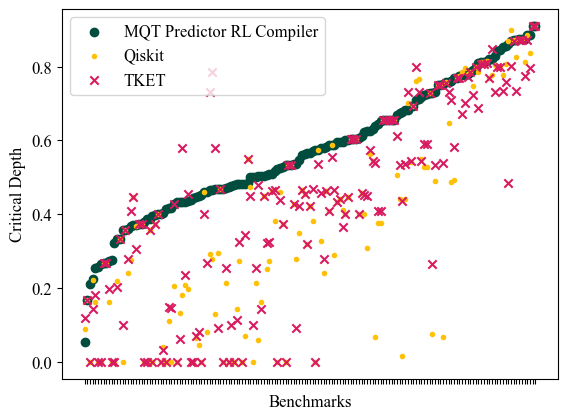

In [26]:
qasm_path = ml.helper.get_path_training_circuits()

from qiskit import QuantumCircuit
for fom in ["expected_fidelity", "critical_depth"]:
    if fom == "expected_fidelity":
        df = df_expected_fidelity
    else:
        df = df_critical_depth  
    df = df.sort_values(by=[f'MQTPredictor_{fom}_{fom}'])
    df[f"predicted_device_{fom}"] = df.apply(
    lambda row: ml.helper.predict_device_for_figure_of_merit(
        QuantumCircuit.from_qasm_file(
            qasm_path/(row["file_path"]+".qasm")), 
        figure_of_merit=fom), 
    axis=1)
    
    MQT = []
    qiskit = []
    tket = []

    for i, row in enumerate(df.iterrows()):
        MQT_value = row[1][f'MQTPredictor_{fom}_{fom}']
        qiskit_value = row[1]["qiskit_" + row[1][f"predicted_device_{fom}"] + f"_{fom}"]
        tket_value = row[1]["tket_" + row[1][f"predicted_device_{fom}"] + f"_{fom}"]
        
        if MQT_value == 0 and qiskit_value == 0 and tket_value == 0:
            continue
            
        MQT.append(MQT_value)
        qiskit.append(qiskit_value)
        tket.append(tket_value)
        
    plt.scatter(range(len(MQT)), MQT, label="MQT Predictor RL Compiler", color=best_color, marker=marker_best)
    plt.scatter(range(len(MQT)), qiskit, label="Qiskit", color=median_color, marker=marker_median)
    plt.scatter(range(len(MQT)), tket, label="TKET", color=worst_color, marker=marker_worst)
    
    plt.xticks(
    list(range(0, len(MQT), 1)),
    [ "" for i in range(0, len(MQT), 1)],
    fontsize=18)
    
    plt.legend() 
    plt.xlabel("Benchmarks")
    plt.ylabel(format_label(fom))
    plt.savefig(fname=f"results/rl_{fom}_comparison.pdf", bbox_inches='tight')
    plt.show()
